In [1]:
%matplotlib inline
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

from dataset.generators import get_dataset

In [2]:
annot_path_val = 'd:///coco-dataset/annotations/person_keypoints_val2017.json'
img_dir_val = 'd://coco-dataset/val2017/'

ds, ds_size = get_dataset(annot_path_val, img_dir_val, batch_size=10, lmdb_file="None", use_o=False)

loading annotations into memory...
Done (t=0.64s)
creating index...
index created!
Loading image annot 0/5000
Loading image annot 2000/5000
Loading image annot 4000/5000
[DEBUG] has prepared 4396 coco-data meta
[DEBUG] read img ok
[DEBUG] augment ok
[DEBUG] build sample ok
[DEBUG] start to execute generator


In [3]:
from timeit import default_timer as timer
data = next(ds.__iter__())
# nds=iter(ds)
# st=timer()
# data=next(nds)
# et=timer()
# print(et-st)

# st=timer()
# data=nds.get_next()
# et=timer()
# print(et-st)



print("Shapes:")
for output in data:
    print(output.shape)

Shapes:
(10, 224, 224, 3)
(10, 28, 28, 38)
(10, 28, 28, 19)


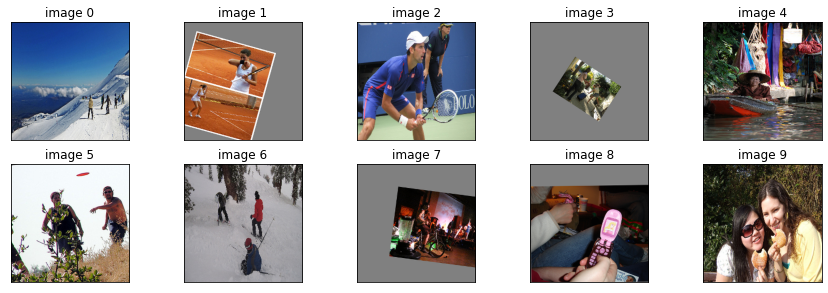

In [4]:
x_batch = data[0].numpy().astype(np.uint8)

figure = plt.figure(figsize=(15,10))

for i in range(10):
    plt.subplot(4,5,i+1,title="image {}".format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img=x_batch[i,...]
    plt.imshow(img[:,:,[2,1,0]])

float32
1.0
0.0


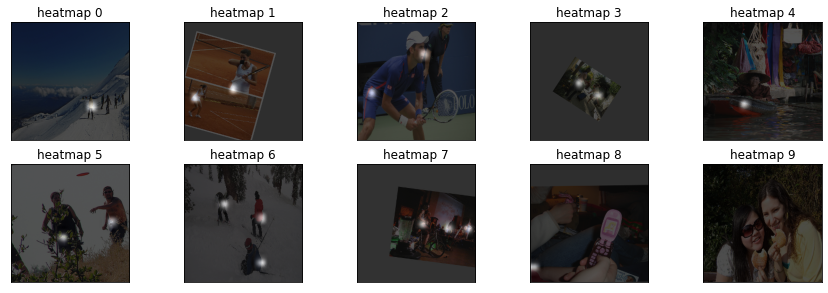

In [7]:
body_part=8
output_idx=2
x_batch = data[0].numpy().astype(np.uint8)
y_batch = data[2].numpy()

print(y_batch.dtype)
print(np.max(y_batch))
print(np.min(y_batch))

figure = plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(4,5,i+1,title="heatmap {}".format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img=x_batch[i,...]
    heatmap=y_batch[i,...]
    heatmap1 = cv2.resize(heatmap[:, :, body_part], (0,0), fx=8, fy=8,interpolation=cv2.INTER_CUBIC)
    plt.imshow(img[:,:,[2,1,0]])
    plt.imshow(heatmap1[:,:], alpha=.7, cmap='gray')

float32
1.0
-1.0


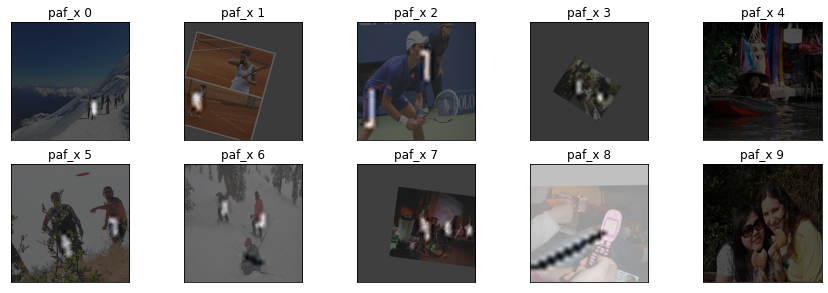

In [8]:
paf_idx = 3
x_batch = data[0].numpy().astype(np.uint8)
y_batch = data[1].numpy()

print (y_batch.dtype)
print (np.max(y_batch))
print (np.min(y_batch))

figure = plt.figure(figsize=(15, 10))
for i in range(10):

    plt.subplot(4, 5, i + 1, title='paf_x {}'.format(i))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = x_batch[i,...]
    paf = y_batch[i,...]
    
    paf1 = cv2.resize(paf[:, :, paf_idx], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
    plt.imshow(img[:,:,[2,1,0]])
    plt.imshow(paf1[:,:], alpha=.7, cmap='gray')

In [6]:
a = [ [1,2], [3,4]]
b= [[-1,-2],[-3,-4]]

for x1,y1,x2,y2 in a,b:
    print(f"{x1} {x2}")to

ValueError: not enough values to unpack (expected 4, got 2)